# COGS 108 - EDA Checkpoint

# Names

- Joonsung Park
- James Chung
- Richard Gross
- Madison Hambly
- Colin Lintereur

<a id='research_question'></a>
# Research Question

How do the most popular topics from previous COGS 108 final projects vary per quarter from 2019 to 2021? Also what other trends can we find in past submissions, like changes in word count, and number of graphs used?

# Setup

In [15]:
import pandas as pd
import glob as glob
import seaborn as sns
sns.set(font_scale=1, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.cbook import boxplot_stats

plt.rcParams['figure.figsize'] = (20, 10)

# using glob to get all csvs
files = glob.glob('./csvs/*.csv')
df = pd.DataFrame()
entries = 0

# read all csvs to dataframes and combine into one df
for f_name in files:
    csv = pd.read_csv(f_name)
    df = df.append(csv)
    entries = entries + len(csv.index)

assert(len(df.index) == entries)
print('Observations: ' + str(len(df.index)))
df.head()

Observations: 364


,Group,Quarter,Year,Topic,Special,Word_Count,Graph_Count,Table_Count
0,1,FA,20,music and audio,False,6999,15,2
1,2,FA,20,automotive,False,8686,18,16
2,4,FA,20,video gaming,False,1864,13,5
3,5,FA,20,sports,False,5483,32,18
4,6,FA,20,pets,False,4595,19,7


# Data Cleaning

Since we are collecting the data ourselves, there is not much work to be done cleaning the data after collecting all of the csv files for each quarter and merging them together into one large dataset. One operation we will perform, however, is generating a "Quarter_Index" so that we can analyze our data in chronological order based on the quarter. We generate a dictionary called `qtr_index_dict` which will generate an index for each quarter from Spring 19 to Spring 21. 

*NOTE, we do not have any data for Fall 2019 so this quarter is skipped when indexing.*

In [16]:
# using glob to get all csvs
files = glob.glob('./csvs/*.csv')
df = pd.DataFrame()
entries = 0

# read all csvs to dataframes and combine into one df
for f_name in files:
    csv = pd.read_csv(f_name)
    df = df.append(csv)
    entries = entries + len(csv.index)

assert(len(df.index) == entries)
print('Observations: ' + str(len(df.index)))

#Add chronological order to rows
chronological = []
#starting from spring 19 as 0
#NOTE: We do not have any data for Fall 2019
qtr_index_dict = {"SP19": 0, "WI20": 1, "SP20": 2, "FA20": 3, "WI21": 4, "SP21": 5}
qtr_index = []

for index, row in df.iterrows():
#     print(row['Quarter'], row['Year'])
    qtr = row['Quarter'] + str(row['Year'])
    qtr_index.append(qtr_index_dict[qtr])
df['Quarter_Index'] = qtr_index

df.head()

Observations: 364


,Group,Quarter,Year,Topic,Special,Word_Count,Graph_Count,Table_Count,Quarter_Index
0,1,FA,20,music and audio,False,6999,15,2,3
1,2,FA,20,automotive,False,8686,18,16,3
2,4,FA,20,video gaming,False,1864,13,5,3
3,5,FA,20,sports,False,5483,32,18,3
4,6,FA,20,pets,False,4595,19,7,3


# Data Analysis & Results (EDA)

First we see how much data we have from each quarter to see if there are any quarters with a lot of projects which may bias our analysis.

<AxesSubplot:xlabel='Quarter_Index', ylabel='count'>

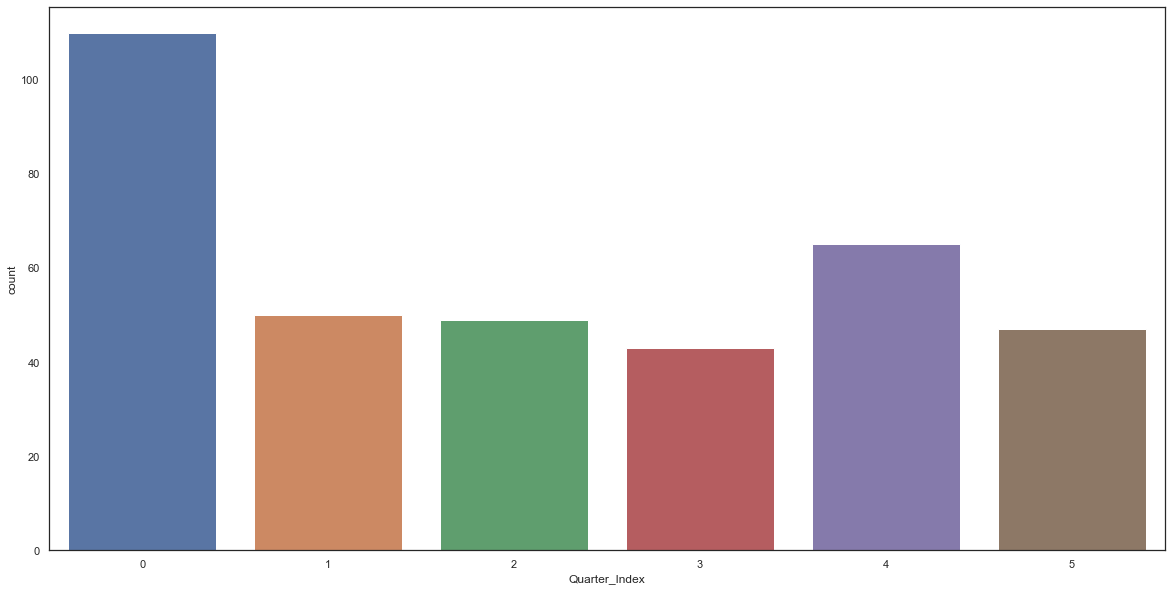

In [17]:
sns.countplot(x='Quarter_Index',data=df)

We can see that our first quarter, Spring 2019, has a much larger number of projects in our datasets than the other quarters. This means that any topics in vogue during that quarter will be disproportionately represented in our data, which will need to be taken into account during analysis.

Next, we counted the total amount of each topic we classified. The overarching topic of each project was found through a topic determining API reading the initial research proposal at the start of each project.

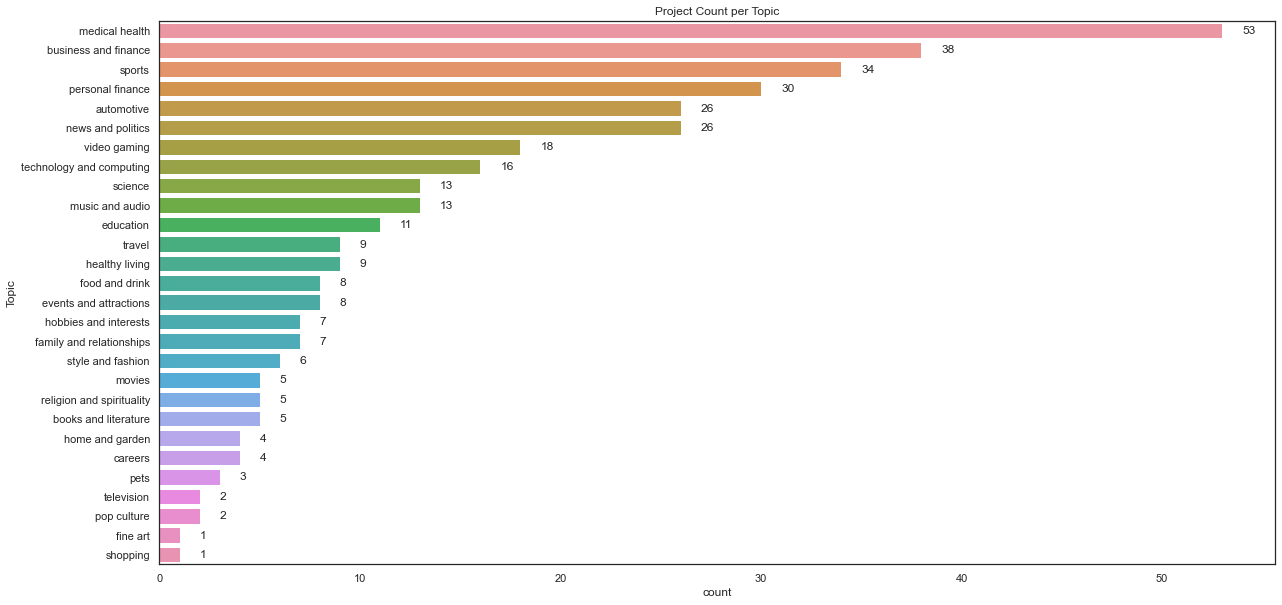

In [18]:
#Total amount of each topic
topic_count = sns.countplot(y='Topic',data=df, order=df['Topic'].value_counts().index)
topic_count.set(title='Project Count per Topic') # title barplot
# label each bar in barplot
for p in topic_count.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    #adding text to each bar
    topic_count.text(x = width+1, # x-coordinate position of data label, padded 1 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center"

We can see that medical health is very popular as research topics which is not too surprising given these quarters were all impacted by COVID. However, even if we ignore the popularity of health related topics, we can see that certain topics are much more popular than others, such as finance and sports over pets and pop culture, as opposed to a uniform distribution of topics.

Next, we measured the word count, graph count, and table count per quarter. 

<AxesSubplot:xlabel='Quarter_Index', ylabel='Word_Count'>

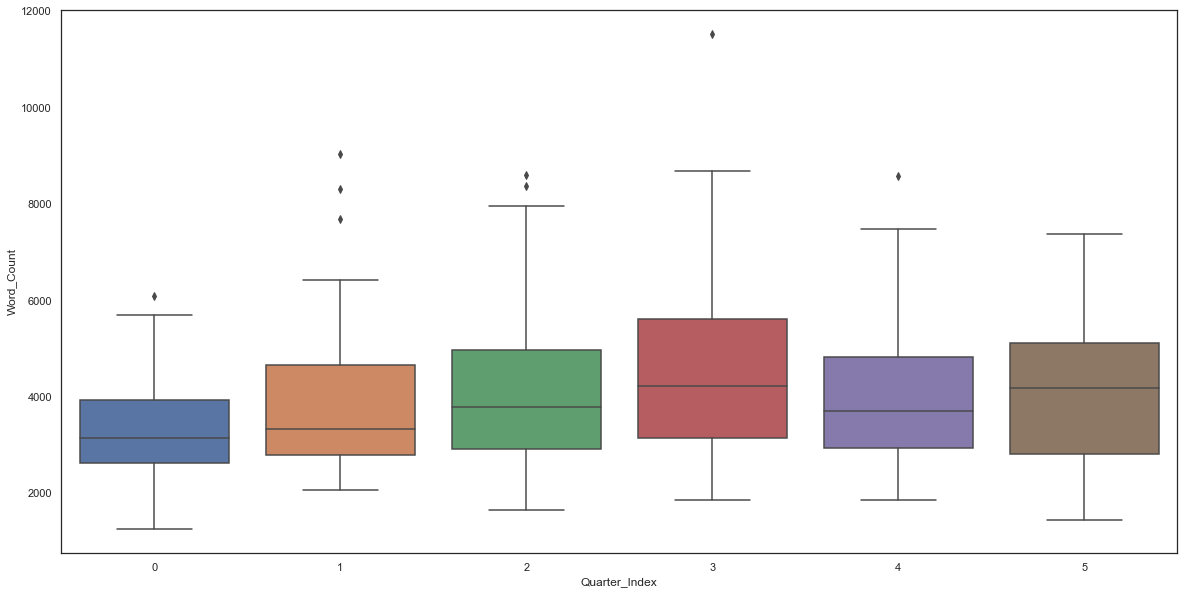

In [19]:
sns.boxplot(x='Quarter_Index', y='Word_Count', data=df)

This graph compares word count per quarter. Interestingly, even though the first quarter on the left, Spring 2019, had double the projects, it has the smallest word count. The word count mean also increases by quarter until Fall 2020 (3), and evens out of at winter 2021 (4)

<AxesSubplot:xlabel='Quarter_Index', ylabel='Graph_Count'>

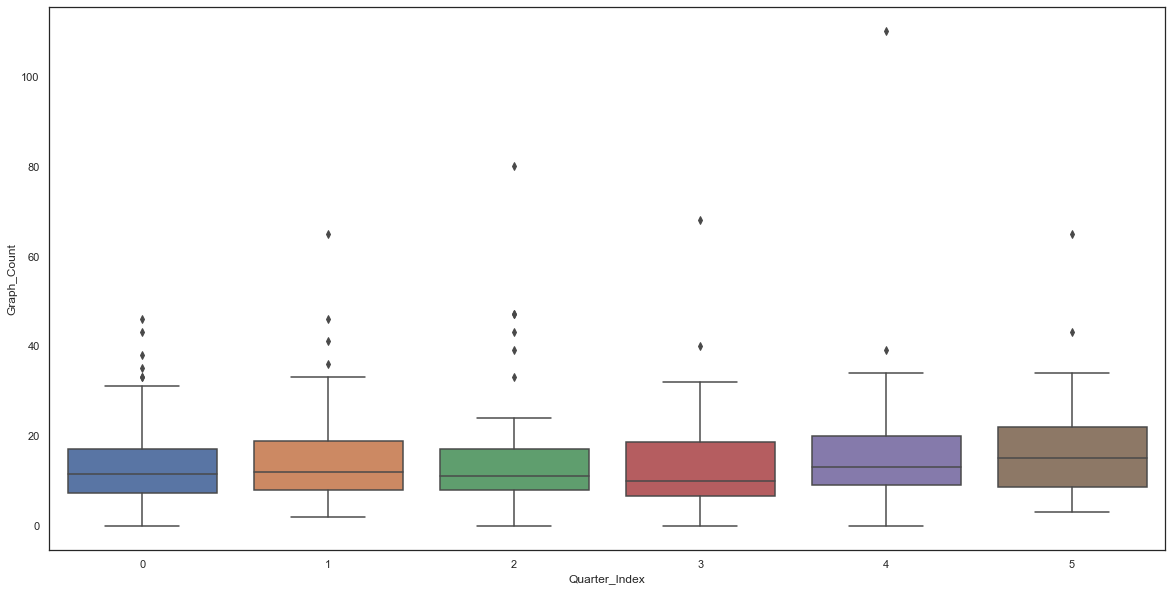

In [20]:
sns.boxplot(x='Quarter_Index', y='Graph_Count', data=df)

This graph compares the amount of images/graphs per quarter. There appears to be no significant trend, with most projects being somewhere between 10 to 20 graphs. Though the single outlier with over 100 graphs in Winter 2021 is impressive.

<AxesSubplot:xlabel='Quarter_Index', ylabel='Table_Count'>

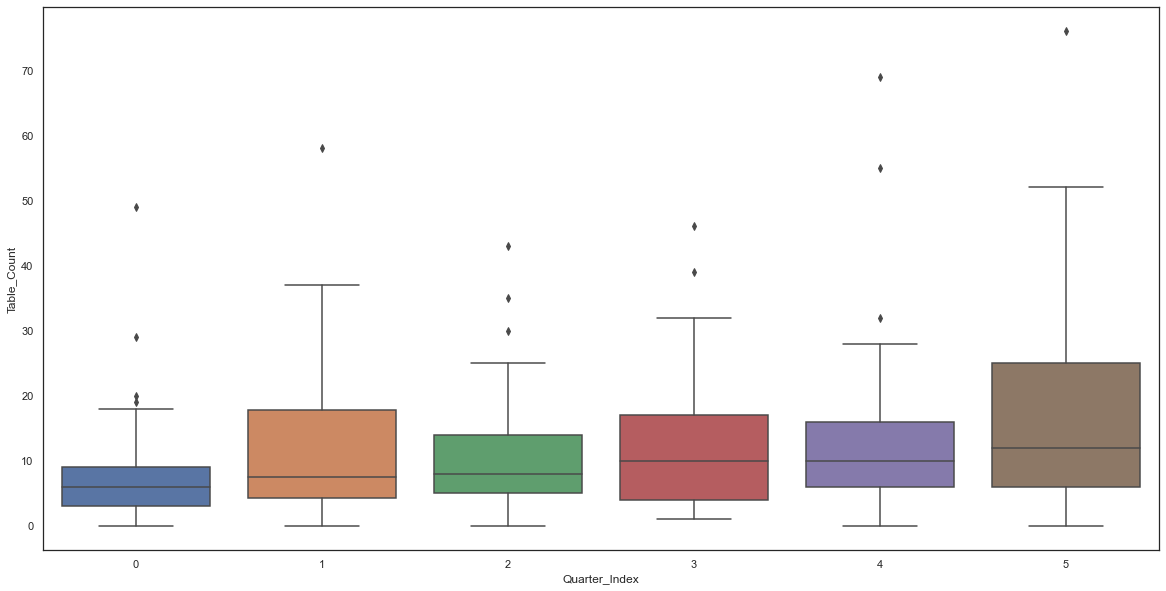

In [21]:
sns.boxplot(x='Quarter_Index', y='Table_Count', data=df)

This graph compares the amount of data tables that appear in the project by quarter. Interestingly, there appears to be a clear upward trend when looking at the means (the middle line of the box plots).

Next, we measured the word count, graph count, and table count per topic.

<AxesSubplot:xlabel='Word_Count', ylabel='Topic'>

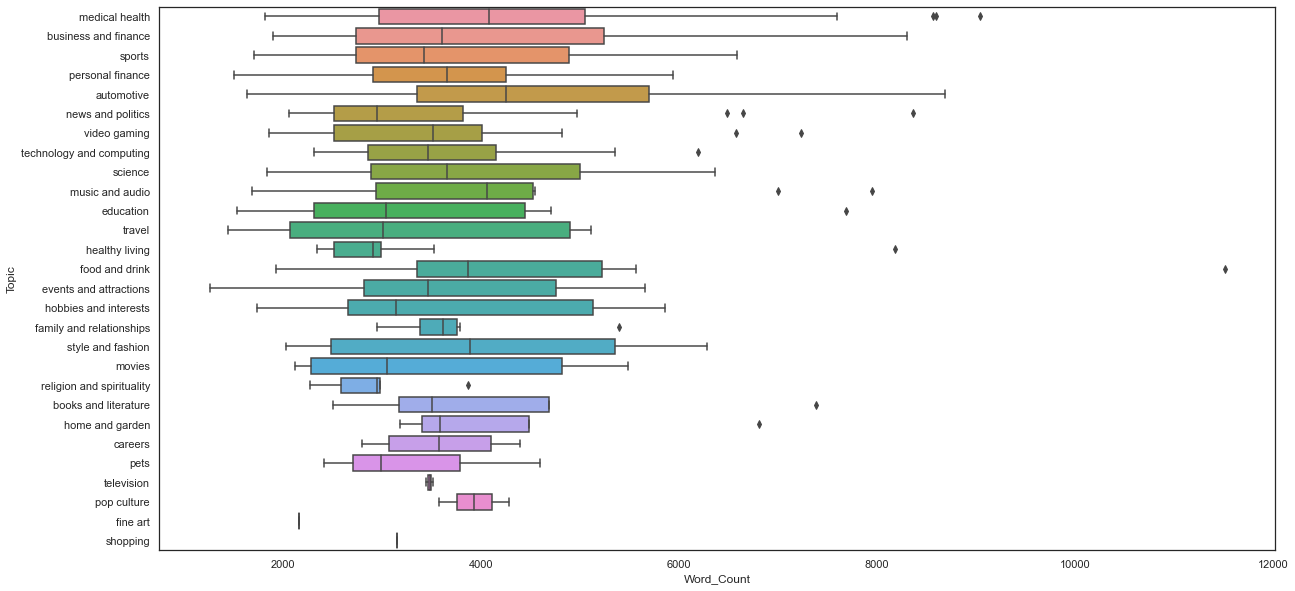

In [22]:
#wordcount boxplot per topic, ordered by topic popularity
sns.boxplot(y='Topic', x='Word_Count', data=df, order=df['Topic'].value_counts().index)

In terms of word count, it seems that the popularity of a topic does not have much an impact. We can see that more popular topics, which are higher up on the boxplots,have longer whiskers but this is most likely caused by higher variability in topics that are more popular since there are more papers for those topics.

<AxesSubplot:xlabel='Graph_Count', ylabel='Topic'>

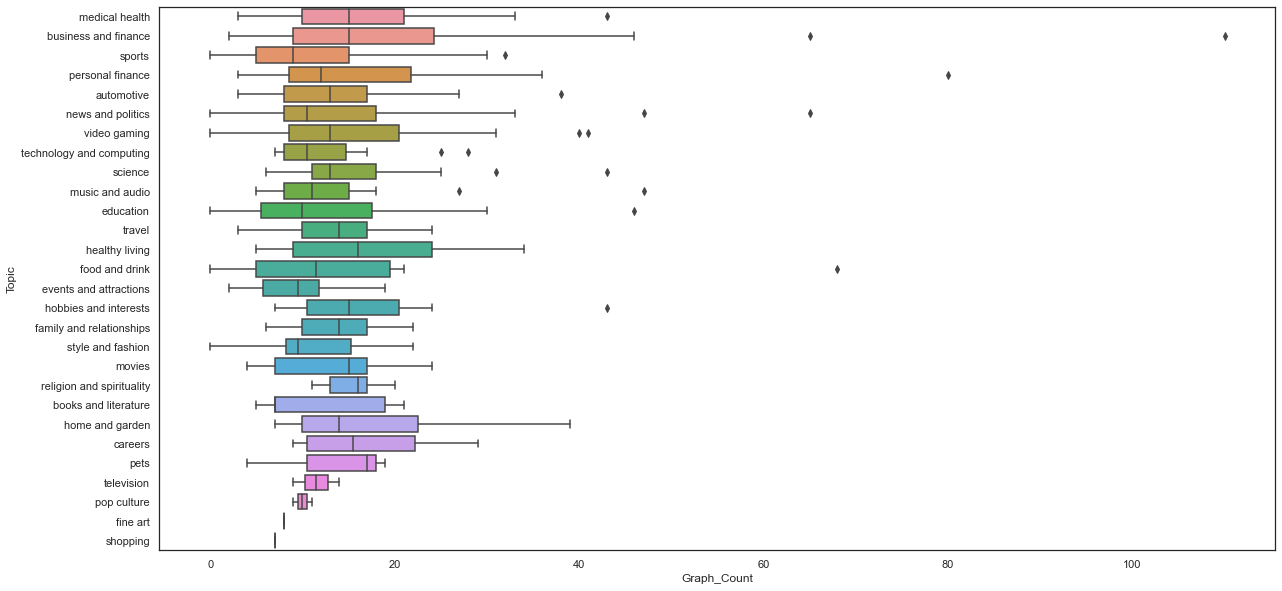

In [23]:
#graphcount boxplot per topic, ordered by topic popularity
sns.boxplot(y='Topic', x='Graph_Count', data=df, order=df['Topic'].value_counts().index)

In term of graph count, there is not much impact based on the popularity of the topic.

<AxesSubplot:xlabel='Table_Count', ylabel='Topic'>

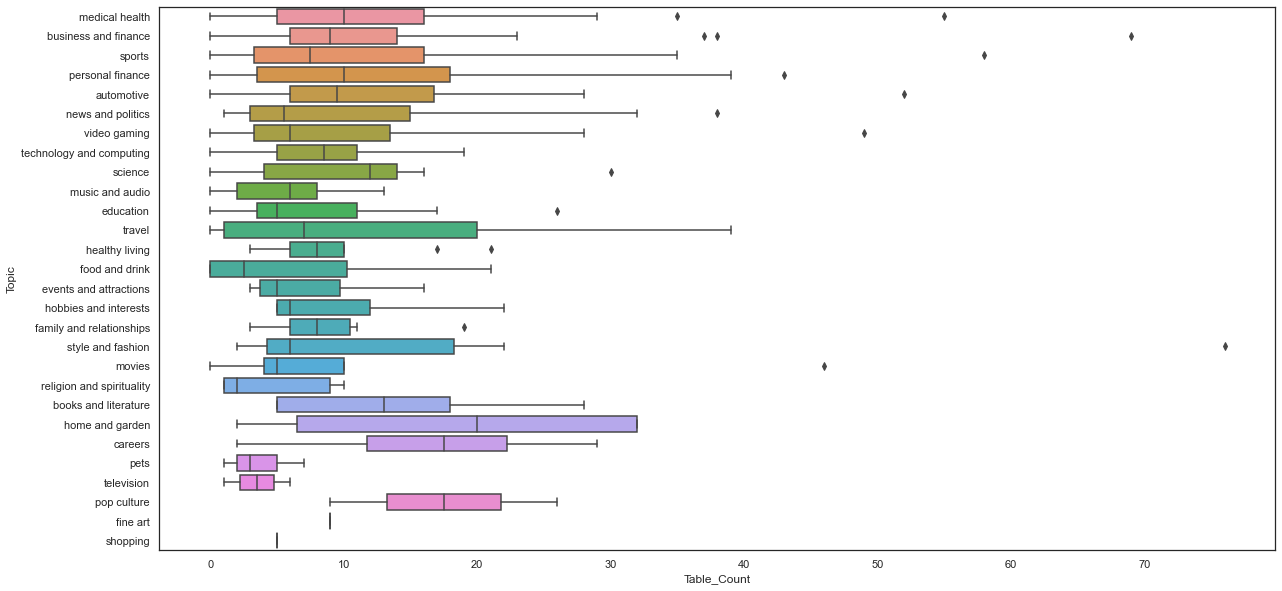

In [24]:
#tablecount boxplot per topic, ordered by topic popularity
sns.boxplot(y='Topic', x='Table_Count', data=df, order=df['Topic'].value_counts().index)

With table count, we can see that less popular topics tend to have higher amounts of tables. 

Next, we graphed the counts of the top 10 most popular topics throughout each quarter using our quarter index. 

<AxesSubplot:xlabel='Topic', ylabel='count'>

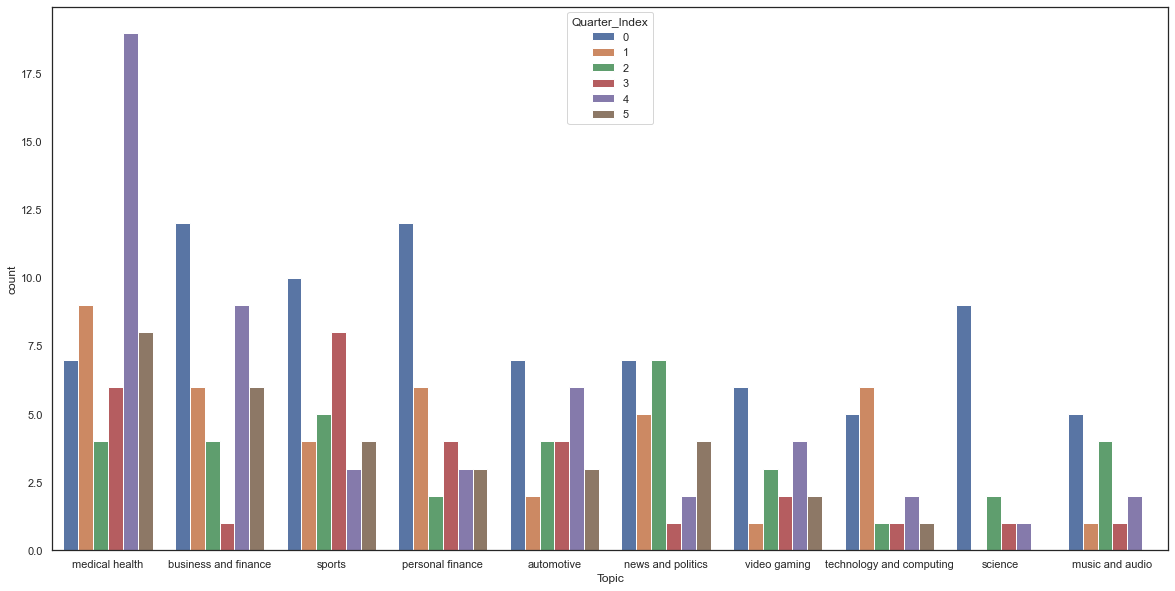

In [25]:
sns.countplot(x='Topic',data=df, hue='Quarter_Index', order=df['Topic'].value_counts().index[:10])

Most topic distributions seem fairly uniform but one notable outlier is 'medical health' in Winter 2021 (4) which had a significant number of papers on that topic.

<AxesSubplot:xlabel='Quarter_Index', ylabel='Count'>

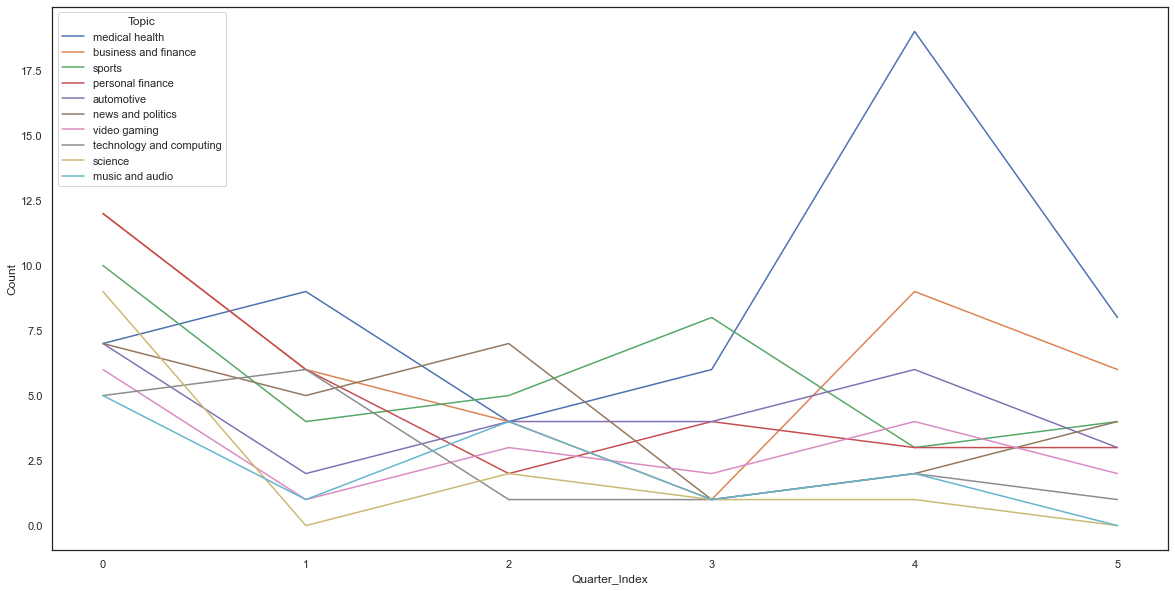

In [26]:
topics = []
indices = []
counts = []

for topic in df['Topic'].value_counts().index[:10]:
    for i in range(6):
        topics.append(topic)
        indices.append(i)
        counts.append(len(df[(df['Topic'] == topic) & (df['Quarter_Index'] == i)]))
        
tempDf = pd.DataFrame()
tempDf['Topic'] = topics
tempDf['Quarter_Index'] = indices
tempDf['Count'] = counts
sns.lineplot(x='Quarter_Index',data=tempDf, hue='Topic', y='Count')

Most topic distributions seem fairly uniform but one notable outlier is 'medical health' in Winter 2021 which had a significant number of papers on that topic.

Next, we wanted to compare the popularity of different project topics within the projects that the instructional staff flagged as being "particularly strong and impressive" (denoted as "special"). 

Text(0.5, 1.0, 'The Five Most Popular Topics Among Projects Denoted as "Special"')

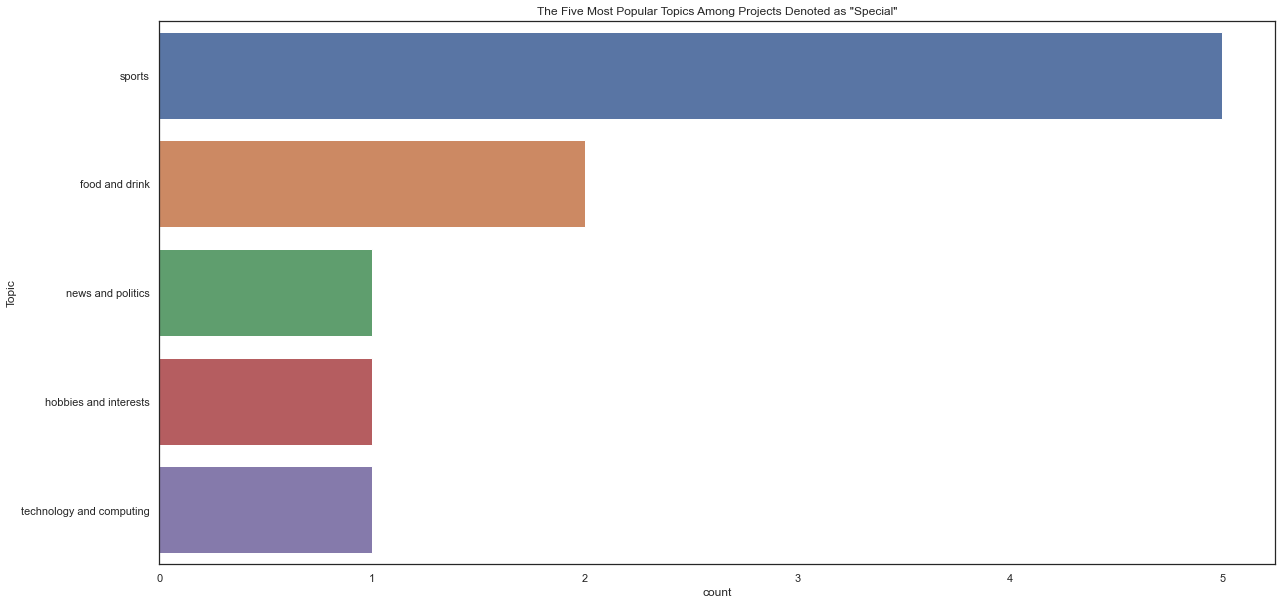

In [27]:
special_df = df.loc[df.Special == True]

special_df.head()

top_special = special_df['Topic'].value_counts()[:5].index.tolist()

top_special_df = special_df[special_df.Topic.isin(top_special)]

top_special_df = top_special_df.reset_index(drop = True)

sns.countplot(y=top_special_df['Topic'], order = top_special_df['Topic'].value_counts().index).set_title('The Five Most Popular Topics Among Projects Denoted as "Special"')


As seen in the bar plot above, the most popular topic category within these special projects was "Sports" by a large margin (five projects out of the total seventeen). The "Food and Drink" category was the second most popular category among the special projects (two out of the seventeen). All other categories listed only had one special project in each. Despite the massive amount of health related projects, not a single one was marked as impressive.

Finally, we took a look at the proportion of projects that were flagged as "special" by the COGS 108 instructional team in each quarter. 

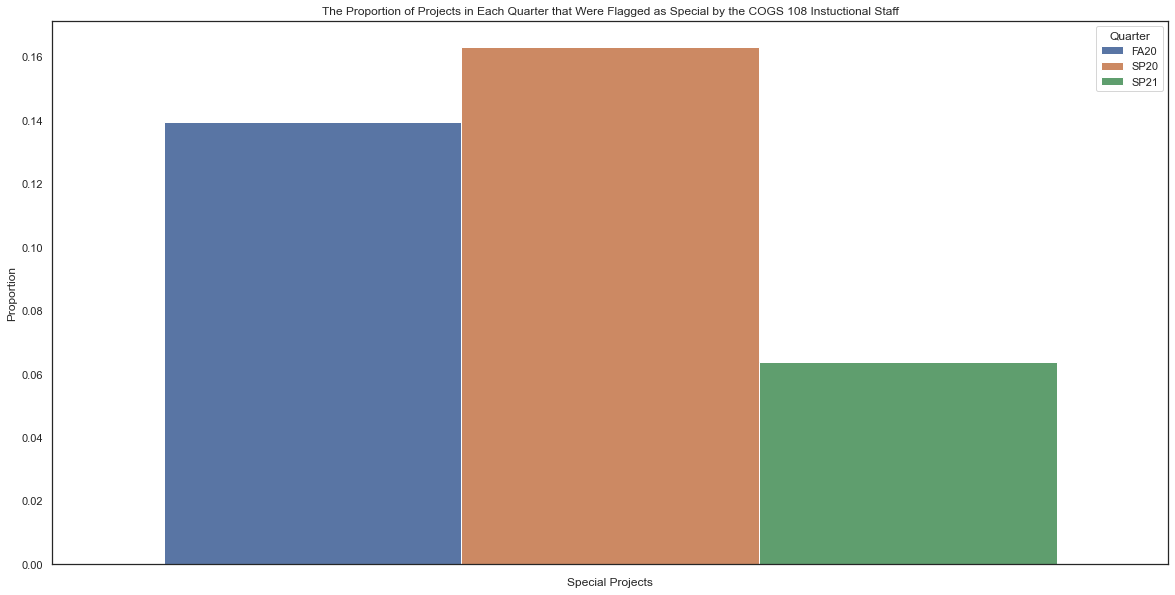

In [36]:
yr_qtr = (df.Quarter).str.cat(df.Year.astype(str))
df_yr_qtr = df

df_yr_qtr = df_yr_qtr.drop(columns = ['Quarter'])


df_yr_qtr['Quarter'] = yr_qtr


yr_qtr_groups = df_yr_qtr.groupby('Quarter')
prop_special = yr_qtr_groups['Special'].value_counts(normalize = True).rename('Proportion')
prop_df = prop_special.to_frame().reset_index()

prop_special_df = prop_df.loc[prop_df['Special'] == True]


prop_plot = sns.barplot(x = 'Special', y = 'Proportion', hue = 'Quarter', data = prop_special_df).set(xticklabels = [], title = ('The Proportion of Projects in Each Quarter that Were Flagged as Special by the COGS 108 Instuctional Staff'), xlabel = ('Special Projects'))


Interestingly, none of the projects in the Spring 2019, Winter 2020 or Winter 2021 quarters were given the distinction of being "special". Approximately 16% of projects from Spring 2020 were flagged as special, the largest proportion among all of the quarters.